In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura del csv generado por scraping, con encabezados en la primera columna
file_path = '/content/drive/My Drive/UNI/Analitica_de_datos/Trabajos/tiempo_huancavelica_selenium.csv'
df = pd.read_csv(file_path,sep=';', header=None, index_col=0)


#Trasposicion del dataframe para trabajarlo como un dataframe normal
df = df.T  # Transponer filas y columnas
"""
df.columns = df.iloc[0]  # Asignar la primera fila como nombres de columna
df = df[1:]  # Eliminar la primera fila (que ahora son los nombres de columna duplicados)
"""

# Imprime las primeras 5 filas del DataFrame
df.head()

,Metrica,Temperatura,Clima,Precipitaciones,Probabilidad de nevada,Humedad,Velocidad del viento,Ráfaga de viento,Ángulo del viento,Dirección del viento,Nubosidad,Visibilidad
1,00:00,7,Ligeras precipitaciones,"0,53",0,94,"2,2","4,5",33°,NNE,57,10
2,01:00,"7,3",Lluvia moderada a intervalos,"0,18",0,93,"3,6","7,6",48°,NE,73,9
3,02:00,"7,1",Lluvia moderada a intervalos,"0,17",0,93,5,"10,6",48°,NE,86,9
4,03:00,"7,5",Lluvia moderada a intervalos,"0,13",0,92,"5,8","12,1",50°,NE,81,10
5,04:00,"7,2",Lluvia moderada a intervalos,"0,07",0,91,"5,8","12,1",56°,ENE,69,10


In [ ]:
#Conversión de columnas númericas a tipo de dato númerico (al leer, todas son Object)
columnas_numericas = ['Temperatura', 'Precipitaciones', 'Probabilidad de nevada', 'Humedad', 'Velocidad del viento', 'Ráfaga de viento', 'Nubosidad', 'Visibilidad']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Eliminar el símbolo de grados y convertir a numérico
df['Ángulo del viento'] = df['Ángulo del viento'].str.rstrip('°').astype(float)

In [ ]:
# Mostrar las columnas del dataset
print("Columnas del dataset:")
print(df.columns)

# Mostrar los valores nulos de cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

Columnas del dataset:
Index(['Metrica', 'Temperatura', 'Clima', 'Precipitaciones',
       'Probabilidad de nevada', 'Humedad', 'Velocidad del viento',
       'Ráfaga de viento', 'Ángulo del viento', 'Dirección del viento',
       'Nubosidad', 'Visibilidad'],
      dtype='object', name=0)

Valores nulos por columna:
0
Metrica                    0
Temperatura                0
Clima                      0
Precipitaciones           24
Probabilidad de nevada     0
Humedad                    0
Velocidad del viento       0
Ráfaga de viento           0
Ángulo del viento          0
Dirección del viento       0
Nubosidad                  0
Visibilidad                0
dtype: int64

Tipos de datos por columna:
0
Metrica                    object
Temperatura               float64
Clima                      object
Precipitaciones           float64
Probabilidad de nevada      int64
Humedad                     int64
Velocidad del viento      float64
Ráfaga de viento          float64
Ángulo del viento

In [ ]:
#Tratamiento de valores nulos
for i in columnas_numericas:
  df[i].fillna(df[i].median(), inplace=True)

<ipython-input-27-2ec78f2ea7f1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)


In [ ]:
# Mostrar estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df.describe())


Estadísticas descriptivas para variables numéricas:
0      Temperatura  Precipitaciones  Probabilidad de nevada    Humedad  \
count         24.0              0.0                    24.0  24.000000   
mean           7.0              NaN                     0.0  85.000000   
std            0.0              NaN                     0.0  10.954451   
min            7.0              NaN                     0.0  65.000000   
25%            7.0              NaN                     0.0  76.500000   
50%            7.0              NaN                     0.0  92.000000   
75%            7.0              NaN                     0.0  93.000000   
max            7.0              NaN                     0.0  97.000000   

0      Velocidad del viento  Ráfaga de viento  Ángulo del viento  Nubosidad  \
count                  24.0         24.000000          24.000000  24.000000   
mean                    5.0          8.500000         108.166667  73.875000   
std                     0.0          0.1474

In [ ]:
# Contar los tipos de valores diferentes en una columna
def contar_valores_unicos(df, columna):
    print(f"\nValores únicos en la columna '{columna}':")
    print(df[columna].value_counts())

contar_valores_unicos(df, 'Clima')
contar_valores_unicos(df, 'Dirección del viento')


Valores únicos en la columna 'Clima':
Clima
Lluvia moderada a intervalos                              14
Ligeras precipitaciones                                    7
Intervalos de lluvias ligeras con tomenta en la región     3
Name: count, dtype: int64

Valores únicos en la columna 'Dirección del viento':
Dirección del viento
E      5
ENE    5
NE     4
NNE    3
S      2
ESE    1
SSE    1
SSW    1
N      1
NNW    1
Name: count, dtype: int64


In [ ]:
#CODIGO PARA GRAFICO DE BARRAS
def MakePlotBar(df, NombreVariable, titulo = "Poner un título", GuardarIMG=False):
  #Crear el gráfico y los ejes a manipular
  fig,ax = plt.subplots(figsize=(16,9))

  #Definir ejes
  x = df[NombreVariable].value_counts(ascending=True).index
  y = df[NombreVariable].value_counts(ascending=True)

  ax.barh(x,y,height=0.75,color="green")

  ax.set_title(titulo, fontsize=18, color="red",loc="right")

  ax.xaxis.set_tick_params(labelsize=8.5,labelcolor="black")
  ax.set_xticklabels(ax.get_xticks(),rotation=45,weight='bold',size=12)
  ax.yaxis.set_tick_params(labelsize=15,labelcolor="black")

  #Formato de miles a texto
  def MakeMiles(numero):
    if 1000<=numero<=9999:
      return str(numero)[0]+","+str(numero)[1:]
    elif 10000<=numero<=99999:
      return str(numero)[:2]+","+str(numero)[2:]
    else:
      return str(numero)

  #Asegurar que el texto no se superponga con el gráfico de barras
  for i,v in enumerate(y):
      ax.text(v+1,i,f'{MakeMiles(v)}',color="blue")

  plt.tight_layout()

  #dar amplitud al grafico
  niveles_var={}
  for nivel in df[NombreVariable].unique():
    niveles_var[nivel] = df[df[NombreVariable]==nivel].shape[0]

  #convertir el diccionario en serie
  niveles_var_df = pd.Series(niveles_var)

  #agregar el maximo nivel de barra a cada limite
  LimiteX = niveles_var_df.sort_values(ascending=False)[0]
  plt.xlim(0,1.1*LimiteX)

  #guardar imagen
  if GuardarIMG==True:
    tituloIMG=titulo+ ".jpeg"
    plt.savefig(tituloIMG,dpi=300)

  #graficar
  plt.show()

<ipython-input-16-88760baeab5c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),rotation=45,weight='bold',size=12)
<ipython-input-16-88760baeab5c>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LimiteX = niveles_var_df.sort_values(ascending=False)[0]


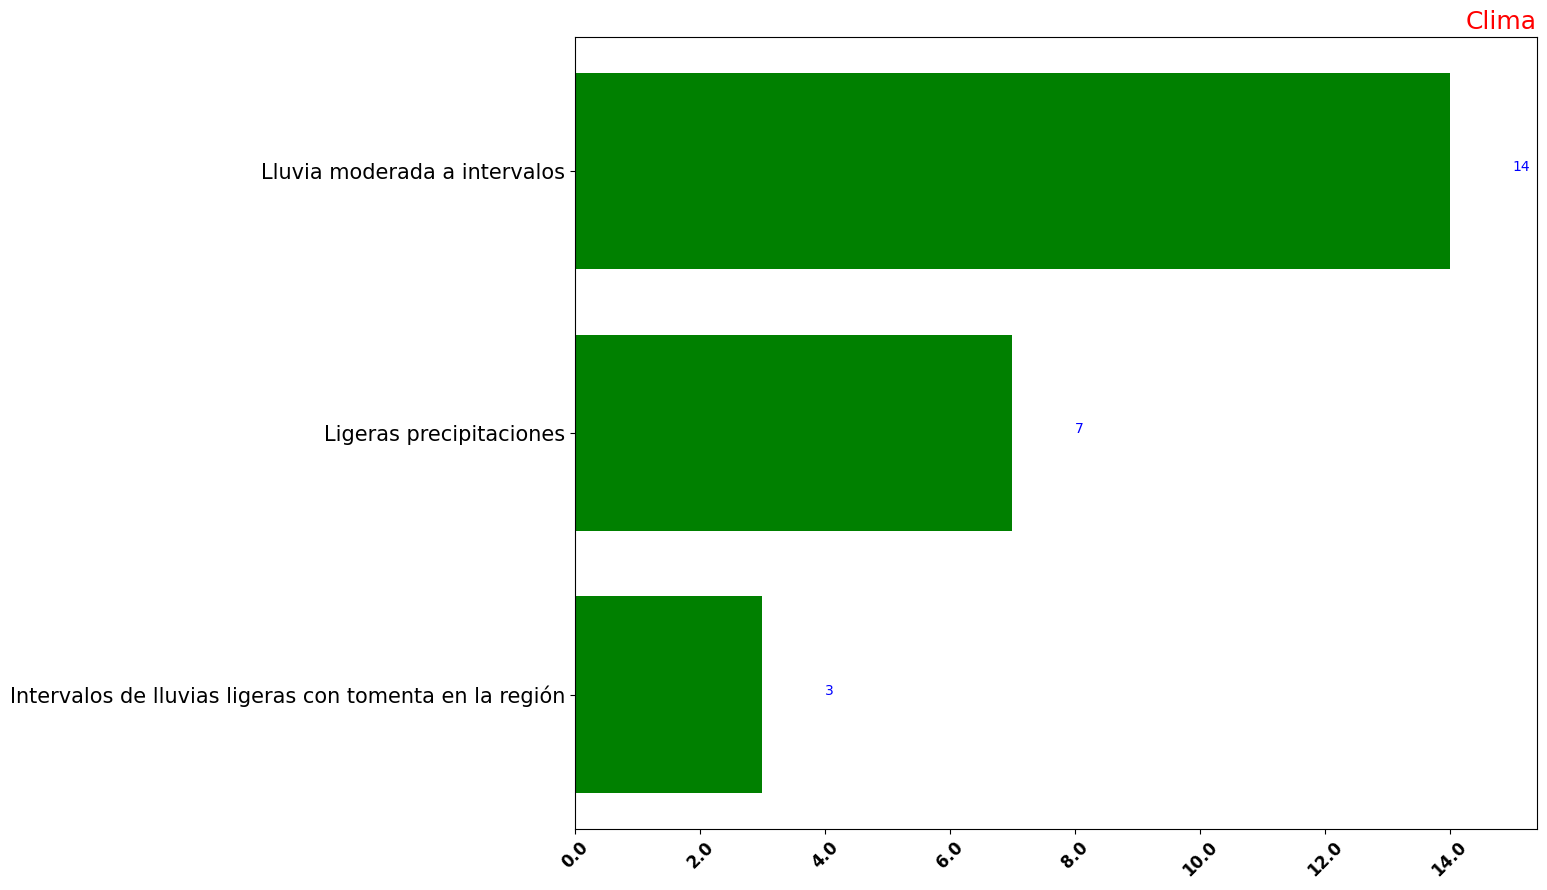

In [ ]:
#Grafico de barras para la columna 'Clima'
MakePlotBar(df,'Clima','Clima', True)

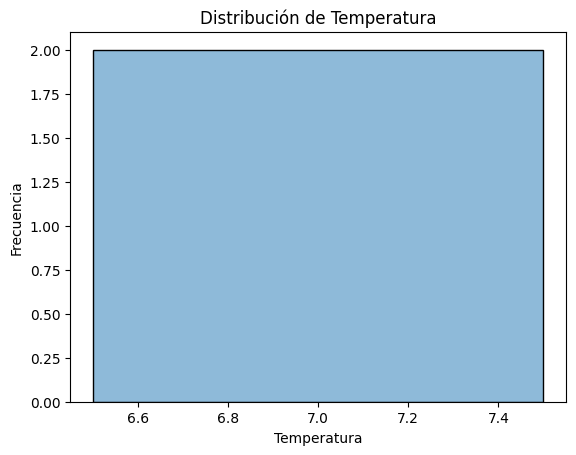

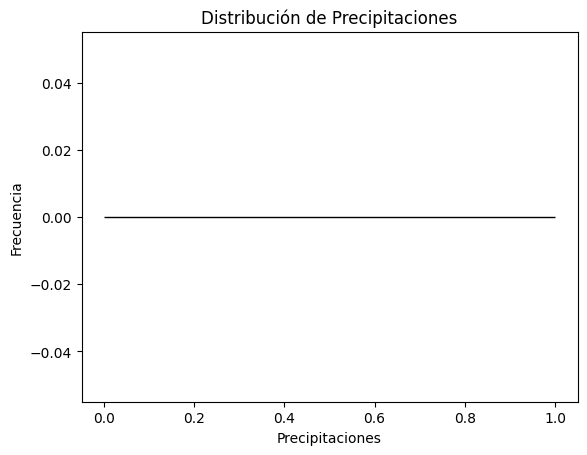

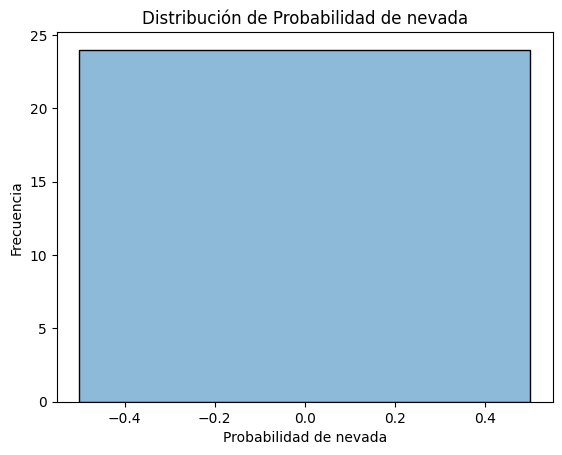

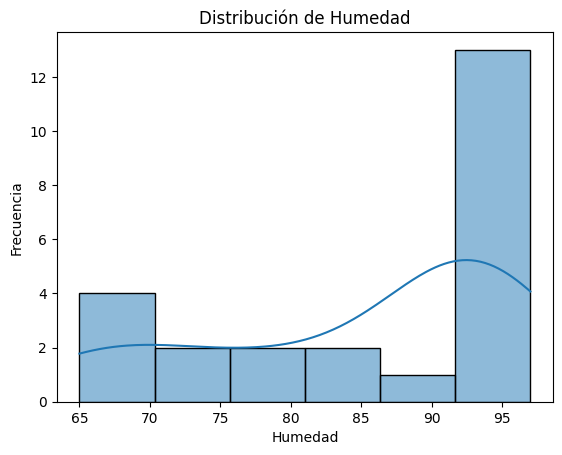

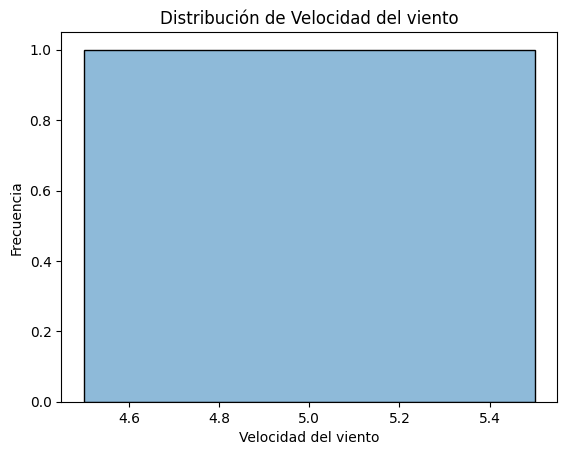

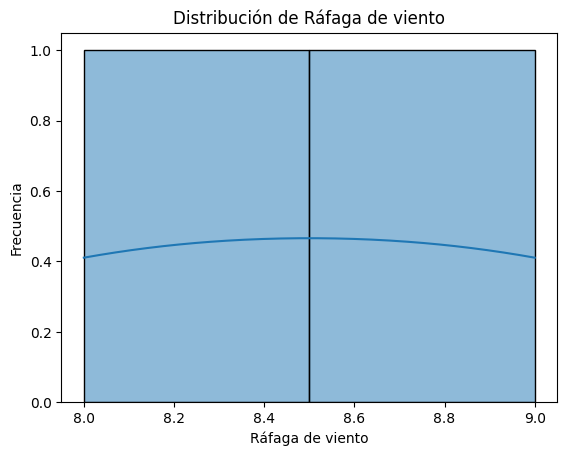

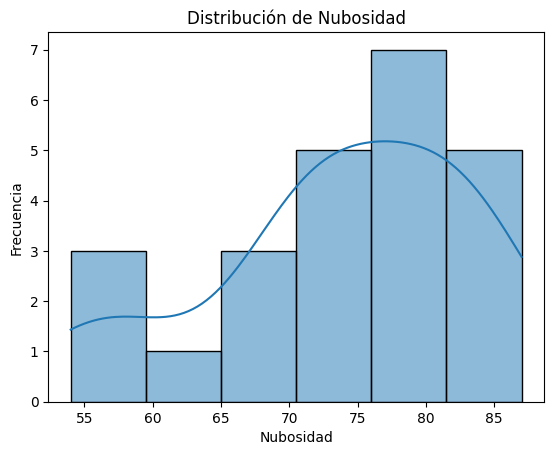

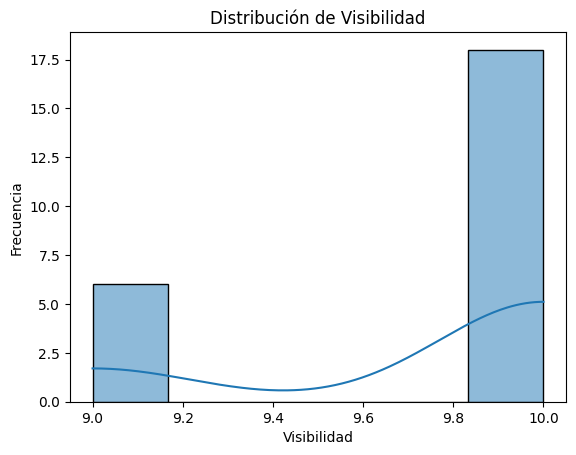

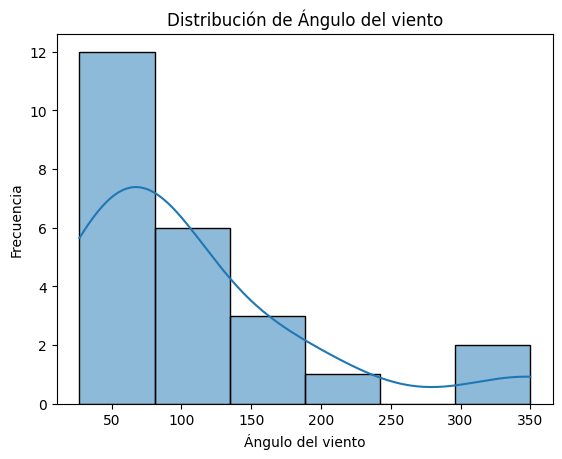

In [ ]:
#histogramas de variables numéricas
columnas_numericas.append('Ángulo del viento')
for col in columnas_numericas:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

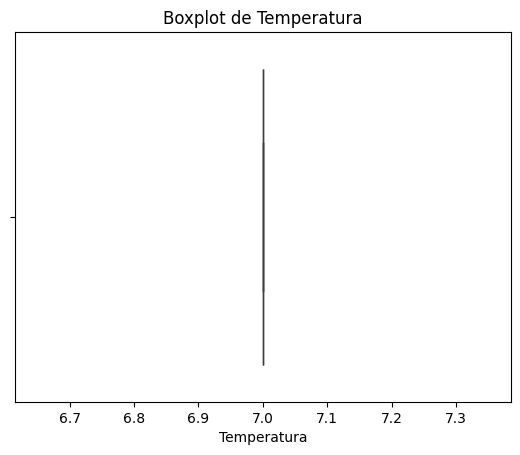

ValueError: List of boxplot statistics and `positions` values must have same the length

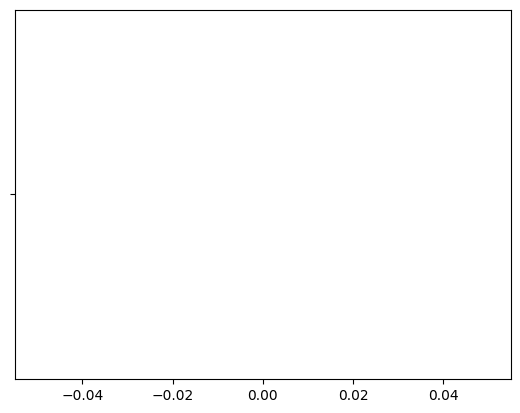

In [ ]:
#Detección de outliers en variables numéricas con boxplots
for col in columnas_numericas:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()